In [1]:
import tensorflow as tf
import pandas as pd

tf.compat.v1.disable_v2_behavior()

import codecs
import numpy as np
import math
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score # New
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow.keras.preprocessing
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Add, Multiply
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation, BatchNormalization
# regularizers
from tensorflow.keras.layers import Conv1D, Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout
from scipy import signal
import openpyxl

data_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2011_smd_hourly.xls'
data_source_2011 = pd.read_excel(data_path_2011, sheet_name='ISONE CA')
data_source_2011 = pd.DataFrame(data_source_2011)
data_set_2011 = data_source_2011.iloc[:, -4:-1]
data_set_2011 = np.array(data_set_2011)

data_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2012_smd_hourly.xls'
data_source_2012 = pd.read_excel(data_path_2012, sheet_name='ISONE CA')
data_source_2012 = pd.DataFrame(data_source_2012)
data_set_2012a = np.array(data_source_2012.iloc[:1416, -4:-1])
data_set_2012b = np.array(data_source_2012.iloc[1440:, -4:-1])
data_set_2012 = np.vstack([data_set_2012a, data_set_2012b])
data_set_2012 = np.array(data_set_2012)

data_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2013_smd_hourly.xls'
data_source_2013 = pd.read_excel(data_path_2013, sheet_name='ISONE CA')
data_source_2013 = pd.DataFrame(data_source_2013)
data_set_2013 = data_source_2013.iloc[:, -4:-1]
data_set_2013 = np.array(data_set_2013)

data_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2014_smd_hourly.xls'
data_source_2014 = pd.read_excel(data_path_2014, sheet_name='ISONE CA')
data_source_2014 = pd.DataFrame(data_source_2014)
data_set_2014 = data_source_2014.iloc[:, -4:-1]
data_set_2014 = np.array(data_set_2014)

data_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2015_smd_hourly.xls'
data_source_2015 = pd.read_excel(data_path_2015, sheet_name='ISONE CA')
data_source_2015 = pd.DataFrame(data_source_2015)
data_set_2015 = data_source_2015.iloc[:, -4:-1]
data_set_2015 = np.array(data_set_2015)

data_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2016_smd_hourly.xls'
data_source_2016 = pd.read_excel(data_path_2016, sheet_name='ISO NE CA')
data_source_2016 = pd.DataFrame(data_source_2016)
data_set_2016a = np.array(data_source_2016.iloc[:1416, -5:-2])
data_set_2016b = np.array(data_source_2016.iloc[1440:, -5:-2])
data_set_2016 = np.vstack([data_set_2016a, data_set_2016b])
data_set_2016 = np.array(data_set_2016)

data_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2017_smd_hourly.xlsx'
data_source_2017 = pd.read_excel(data_path_2017, sheet_name='ISO NE CA')
data_source_2017 = pd.DataFrame(data_source_2017)
data_set_2017 = data_source_2017.iloc[:, -9:-6]
data_set_2017 = np.array(data_set_2017)

data_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2018_smd_hourly.xlsx'
data_source_2018 = pd.read_excel(data_path_2018, sheet_name='ISO NE CA')
data_source_2018 = pd.DataFrame(data_source_2018)
data_set_2018 = data_source_2018.iloc[:, -9:-6]
data_set_2018 = np.array(data_set_2018)

data_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2019_smd_hourly.xlsx'
data_source_2019 = pd.read_excel(data_path_2019, sheet_name='ISO NE CA')
data_source_2019 = pd.DataFrame(data_source_2019)
data_set_2019 = data_source_2019.iloc[:, -9:-6]
data_set_2019 = np.array(data_set_2019)

load = np.vstack([data_set_2011, data_set_2012, data_set_2013, data_set_2014, data_set_2015, data_set_2016, data_set_2017, data_set_2018, data_set_2019])
print(data_set_2011.shape)
print(data_set_2012.shape)
print(data_set_2013.shape)
print(data_set_2014.shape)
print(data_set_2015.shape)
print(data_set_2016.shape)
print(data_set_2017.shape)
print(data_set_2018.shape)
print(data_set_2019.shape)
print(load.shape)

pv_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2011.xlsx'
pv_source_2011 = pd.read_excel(pv_path_2011, sheet_name='HourlyData')
pv_source_2011 = pd.DataFrame(pv_source_2011)
pv_set_2011 = pv_source_2011.iloc[:, 3]
pv_set_2011 = pv_set_2011.fillna(0)
pv_set_2011 = np.array(pv_set_2011)
pv_set_2011 = pv_set_2011.reshape(-1,1)

pv_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2012.xlsx'
pv_source_2012 = pd.read_excel(pv_path_2012, sheet_name='HourlyData')
pv_source_2012 = pd.DataFrame(pv_source_2012)
pv_source_2012 = pv_source_2012.fillna(0)
pv_set_2012a = np.array(pv_source_2012.iloc[:1416, 3])
pv_set_2012b = np.array(pv_source_2012.iloc[1440:, 3])
pv_set_2012 = np.concatenate((pv_set_2012a, pv_set_2012b), axis=None)
pv_set_2012 = np.array(pv_set_2012)
pv_set_2012 = pv_set_2012.reshape(-1,1)

pv_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2013.xlsx'
pv_source_2013 = pd.read_excel(pv_path_2013, sheet_name='HourlyData')
pv_source_2013 = pd.DataFrame(pv_source_2013)
pv_set_2013 = pv_source_2013.iloc[:, 3]
pv_set_2013 = pv_set_2013.fillna(0)
pv_set_2013 = np.array(pv_set_2013)
pv_set_2013 = pv_set_2013.reshape(-1,1)

pv_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2014.xlsx'
pv_source_2014 = pd.read_excel(pv_path_2014, sheet_name='HourlyData')
pv_source_2014 = pd.DataFrame(pv_source_2014)
pv_set_2014 = pv_source_2014.iloc[:, 3]
pv_set_2014 = pv_set_2014.fillna(0)
pv_set_2014 = np.array(pv_set_2014)
pv_set_2014 = pv_set_2014.reshape(-1,1)

pv_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2015.xlsx'
pv_source_2015 = pd.read_excel(pv_path_2015, sheet_name='HourlyData')
pv_source_2015 = pd.DataFrame(pv_source_2015)
pv_set_2015 = pv_source_2015.iloc[:, 3]
pv_set_2015 = pv_set_2015.fillna(0)
pv_set_2015 = np.array(pv_set_2015)
pv_set_2015 = pv_set_2015.reshape(-1,1)

pv_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2016.xlsx'
pv_source_2016 = pd.read_excel(pv_path_2016, sheet_name='HourlyData')
pv_source_2016 = pd.DataFrame(pv_source_2016)
pv_source_2016 = pv_source_2016.fillna(0)
pv_set_2016a = np.array(pv_source_2016.iloc[:1416, 3])
pv_set_2016b = np.array(pv_source_2016.iloc[1440:, 3])
pv_set_2016 = np.concatenate((pv_set_2016a, pv_set_2016b), axis=None)
pv_set_2016 = np.array(pv_set_2016)
pv_set_2016 = pv_set_2016.reshape(-1,1)

pv_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2017.xlsx'
pv_source_2017 = pd.read_excel(pv_path_2017, sheet_name='HourlyData')
pv_source_2017 = pd.DataFrame(pv_source_2017)
pv_set_2017 = pv_source_2017.iloc[:, 3]
pv_set_2017 = pv_set_2017.fillna(0)
pv_set_2017 = np.array(pv_set_2017)
pv_set_2017 = pv_set_2017.reshape(-1,1)

pv_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2018.xlsx'
pv_source_2018 = pd.read_excel(pv_path_2018, sheet_name='HourlyData')
pv_source_2018 = pd.DataFrame(pv_source_2018)
pv_set_2018 = pv_source_2018.iloc[:, 3]
pv_set_2018 = pv_set_2018.fillna(0)
pv_set_2018 = np.array(pv_set_2018)
pv_set_2018 = pv_set_2018.reshape(-1,1)

pv_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2019.xlsx'
pv_source_2019 = pd.read_excel(pv_path_2019, sheet_name='HourlyData')
pv_source_2019 = pd.DataFrame(pv_source_2019)
pv_set_2019 = pv_source_2019.iloc[:, 3]
pv_set_2019 = pv_set_2019.fillna(0)
pv_set_2019 = np.array(pv_set_2019)
pv_set_2019 = pv_set_2019.reshape(-1,1)

pv = np.concatenate((pv_set_2011, pv_set_2012, pv_set_2013, pv_set_2014, pv_set_2015, pv_set_2016, pv_set_2017, pv_set_2018, pv_set_2019), axis=None)
pv = pv.reshape(-1,1)
print(pv.shape)

weather_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2011.csv'
weather_source_2011 = pd.read_csv(weather_path_2011)
weather_source_2011 = pd.DataFrame(weather_source_2011)
weather_set_2011 = weather_source_2011.iloc[2:, 5:16]
weather_set_2011 = np.array(weather_set_2011, dtype='float')

weather_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2012.csv'
weather_source_2012 = pd.read_csv(weather_path_2012)
weather_source_2012 = pd.DataFrame(weather_source_2012)
weather_set_2012 = weather_source_2012.iloc[2:, 5:16]
weather_set_2012 = np.array(weather_set_2012, dtype='float')

weather_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2013.csv'
weather_source_2013 = pd.read_csv(weather_path_2013)
weather_source_2013 = pd.DataFrame(weather_source_2013)
weather_set_2013 = weather_source_2013.iloc[2:, 5:16]
weather_set_2013 = np.array(weather_set_2013, dtype='float')

weather_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2014.csv'
weather_source_2014 = pd.read_csv(weather_path_2014)
weather_source_2014 = pd.DataFrame(weather_source_2014)
weather_set_2014 = weather_source_2014.iloc[2:, 5:16]
weather_set_2014 = np.array(weather_set_2014, dtype='float')

weather_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2015.csv'
weather_source_2015 = pd.read_csv(weather_path_2015)
weather_source_2015 = pd.DataFrame(weather_source_2015)
weather_set_2015 = weather_source_2015.iloc[2:, 5:16]
weather_set_2015 = np.array(weather_set_2015, dtype='float')

weather_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2016.csv'
weather_source_2016 = pd.read_csv(weather_path_2016)
weather_source_2016 = pd.DataFrame(weather_source_2016)
weather_set_2016 = weather_source_2016.iloc[2:, 5:16]
weather_set_2016 = np.array(weather_set_2016, dtype='float')

weather_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2017.csv'
weather_source_2017 = pd.read_csv(weather_path_2017)
weather_source_2017 = pd.DataFrame(weather_source_2017)
weather_set_2017 = weather_source_2017.iloc[2:, 5:16]
weather_set_2017 = np.array(weather_set_2017, dtype='float')

weather_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2018.csv'
weather_source_2018 = pd.read_csv(weather_path_2018)
weather_source_2018 = pd.DataFrame(weather_source_2018)
weather_set_2018 = weather_source_2018.iloc[2:, 5:16]
weather_set_2018 = np.array(weather_set_2018, dtype='float')

weather_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2019.csv'
weather_source_2019 = pd.read_csv(weather_path_2019)
weather_source_2019 = pd.DataFrame(weather_source_2019)
weather_set_2019 = weather_source_2019.iloc[2:, 5:16]
weather_set_2019 = np.array(weather_set_2019, dtype='float')

weather = np.vstack((weather_set_2011, weather_set_2012, weather_set_2013, weather_set_2014, weather_set_2015, weather_set_2016, weather_set_2017, weather_set_2018, weather_set_2019))
print(weather_set_2011.shape)
print(weather_set_2012.shape)
print(weather_set_2013.shape)
print(weather_set_2014.shape)
print(weather_set_2015.shape)
print(weather_set_2016.shape)
print(weather_set_2017.shape)
print(weather_set_2018.shape)
print(weather_set_2019.shape)
print(weather.shape)

weather_dat = np.zeros(shape=(78840,11))
print(weather[1,:])
print(weather[2,:])
print(weather[3,:])
for i in range(78840):
    weather_dat[i,:] = np.add(weather[2*i,:],weather[2*i+1,:])
weather_dat = np.true_divide(weather_dat,2)
print(weather_dat)
print(weather_dat.shape)

Instructions for updating:
non-resource variables are not supported in the long term
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(78840, 3)
(78840, 1)


C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(157680, 11)
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5896e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5579e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5161e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[[  0.      0.      0.    ...   0.866   0.1   100.   ]
 [  0.      0.      0.    ...   0.866   0.1   100.   ]
 [  0.      0.      0.    ...   0.866   0.1   100.   ]
 ...
 [  0.      0.      0.    ...   0.11    0.4    97.18 ]
 [  0.      0.      0.    ...   0.11    0.4    96.97 ]
 [  0.      0.      0.    ...   0.11    0.4    97.225]]
(78840, 11)


In [2]:
dataall = np.hstack([load, pv, weather_dat])
index=['Dry bulb F','Dew Point F', 'System Load', 'Measured PV','DHI','DNI','GHI','CS_DHI','CS_DNI','CS_GHI','DP_C','SZ Angle','Surf Albedo','Wind Speed', 'Rel. Humidity']
dataall = np.vstack([index, dataall])
print(dataall.shape)
print(max(dataall[1:,2]))

(78841, 15)
9999.0


In [3]:
df = pd.DataFrame(dataall[1:,:], columns=dataall[0,:])
df.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,36.0,29.0,12214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159.77,0.866,0.1,100.0
1,36.0,29.0,11573.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.7,0.866,0.1,100.0
2,35.0,29.0,11114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.23000000000002,0.866,0.1,100.0
3,35.0,30.0,10863.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.525,0.866,0.1,100.0
4,36.0,31.0,10827.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.47500000000001,0.866,0.1,100.0


In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)

In [5]:
import seaborn as sns
from keijzer import *
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import Dense, Input, Flatten, Add, concatenate, Dropout, Activation, Multiply
from tensorflow.keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D  
from tensorflow.keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from tensorflow.keras.utils import plot_model
from tensorflow.keras import activations
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
import math

def get_flops(model):
    run_meta = tf.RunMetadata()
    opts = tf.profiler.ProfileOptionBuilder.float_operation()

    # We use the Keras session graph in the call to the profiler.
    flops = tf.profiler.profile(graph=K.get_session().graph,
                                run_meta=run_meta, cmd='op', options=opts)

    return flops.total_float_ops  # Prints the "flops" of the model.

class LossHistory(tensorflow.keras.callbacks.Callback):  # history = LossHistory()
    def init(self):  # history.init()
        self.losses = []
        # self.accs = []
        self.val_losses = []
        # self.val_accs = []
        self.rmses = []
        self.mses = []
        self.maes = []
        self.mapes = []
        self.val_rmses = []
        self.val_mses = []
        self.val_maes = []
        self.val_mapes = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        # self.accs.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        # self.val_accs.append(logs.get('val_accuracy
        self.rmses.append(logs.get('root_mean_squared_error'))
        self.mses.append(logs.get('mean_squared_error'))
        self.maes.append(logs.get('mean_absolute_error'))
        self.mapes.append(logs.get('mean_absolute_percentage_error'))
        self.val_rmses.append(logs.get('val_root_mean_squared_error'))
        self.val_mses.append(logs.get('val_mean_squared_error'))
        self.val_maes.append(logs.get('val_mean_absolute_error'))
        self.val_mapes.append(logs.get('val_mean_absolute_percentage_error'))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [6]:
norm_df = np.array(norm_df)
norm_df2 = norm_df[:,(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 14)]
def create_dataset(dataset, timesteps, output_timesteps):
    dataX, dataY = [], []
    for i in range(len(dataset) - timesteps -output_timesteps - 1):
        a = dataset[i:(i + timesteps), :]
        dataX.append(a)
        dataY.append(dataset[(i + timesteps):(i+timesteps+output_timesteps), :])
    return np.array(dataX), np.array(dataY)

timesteps = 24
output_timesteps = 12
X, Y = create_dataset(norm_df2, timesteps, output_timesteps)

print(X.shape)
print(Y.shape)

(78803, 24, 12)
(78803, 12, 12)


In [7]:
trX = X[:47286, :, :]
vaX = X[47286:55170, :, :]
teX = X[55170:, :, :]
trY = Y[:47286, :, 2]
vaY = Y[47286:55170,:, 2]
teY = Y[55170:, :,2]

print(trX.shape)
print(trY.shape)
print(teX.shape)
print(teY.shape)

(47286, 24, 12)
(47286, 12)
(23633, 24, 12)
(23633, 12)


In [8]:
with tf.device('/gpu:0'):
    alpha=1.0
    gamma=1.2
    beta = 1.178511
    num_features = 12
    hfilters = 128
    hkernel_size1 = 2
    hkernel_size2 = 4
    visible1 = Input(shape=(timesteps, num_features))
    per1 = Permute((2,1))(visible1)
    den1a = Dense(timesteps, activation='tanh')(per1)
    den1b = Dense(timesteps, activation='sigmoid')(per1)
    den1 = Multiply()([den1a, den1b])
    per2 = Permute((2,1), name='attention_vec')(den1)
    mul1 = Multiply()([visible1, per2])
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res01 = Add()([d1, visible1])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res02 = Add()([d1, res01])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res03 = Add()([d1, res02])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res04 =Add()([d1, res03])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res04)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=32)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res05 = Add()([d1, res04])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=32)(res05) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res06 = Add()([d1, res05])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res06) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res07 = Add()([d1, res06])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res07)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res08 = Add()([d1, res07])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res08)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res09 = Add()([d1, res08])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res09) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res10 = Add()([d1, res09])   # 
    
    print('res10 :', res10.shape)  # (None, 24, 11) 
    
    out = Conv1D(512, 1, padding='same', activation='relu')(res10)   # 256, 11X10=110  
    out = Dropout(0.2)(out)   
    
    out = Conv1D(256, 1, padding='same', activation='relu')(out) # 512,  110X5=550
    out = Dropout(0.2)(out)  
    
    out = GlobalAveragePooling1D()(out) # pool_size=2, strides=1
    
    out = Dense(output_timesteps)(out) 
    model = Model(inputs=[visible1], outputs=[out])
    
    print(model.summary())
    
    model.compile(loss=root_mean_squared_error, optimizer='adam', metrics=[root_mean_squared_error, 'mse', 'mae', 'mape'])
    early_stopping =EarlyStopping(monitor='val_loss', patience=100)
    batch_size = 100
    epochs = 1000

    history = LossHistory()
    history.init()
    
    #hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

res10 : (?, 24, 12)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 24, 12)]     0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 12, 24)       0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 12, 24)       600         permute[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 12, 24)       600         permute[0][0]                    
__________________________________________________________________________

In [9]:
    %%time
    hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

Train on 47286 samples, validate on 7884 samples
Epoch 1/1000
47286/47286 [==============================] - ETA: 0s - loss: 0.0792 - root_mean_squared_error: 0.0792 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 2493.3621

C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


47286/47286 [==============================] - 15s 322us/sample - loss: 0.0792 - root_mean_squared_error: 0.0792 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 2493.3621 - val_loss: 0.1267 - val_root_mean_squared_error: 0.1267 - val_mean_squared_error: 0.0161 - val_mean_absolute_error: 0.0922 - val_mean_absolute_percentage_error: 26.1214
Epoch 2/1000
47286/47286 [==============================] - 12s 261us/sample - loss: 0.0613 - root_mean_squared_error: 0.0613 - mean_squared_error: 0.0045 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 2491.1973 - val_loss: 0.1082 - val_root_mean_squared_error: 0.1082 - val_mean_squared_error: 0.0118 - val_mean_absolute_error: 0.0805 - val_mean_absolute_percentage_error: 24.4287
Epoch 3/1000
47286/47286 [==============================] - 12s 261us/sample - loss: 0.0576 - root_mean_squared_error: 0.0576 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0464 - mean_absolute_percentage_err

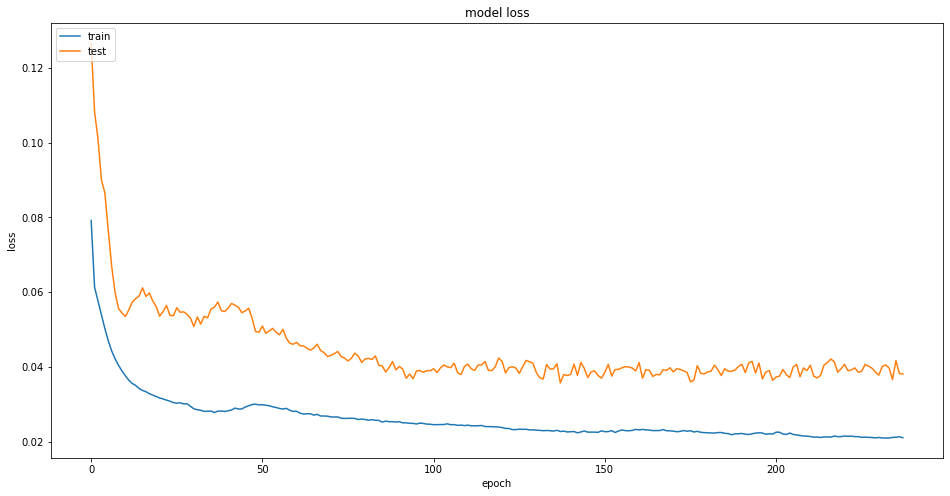

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8)) 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('FSEFF_TrainingandValidation Loss.png')
plt.show()

#print(get_flops(model))

In [11]:
trainPredict = model.predict(trX, batch_size=batch_size)
validPredict = model.predict(vaX, batch_size=batch_size)
testPredict = model.predict(teX, batch_size=batch_size)

In [12]:
tePredict = testPredict.reshape([-1])
testY = teY.reshape([-1])

np.savetxt('FSEFF_testPredict.txt', tePredict)
 
print('Error Test Score > RMSE == ', np.sqrt(np.mean(np.square(testY-tePredict))), ' MAE == ', mean_absolute_error(testY, tePredict), 'MAPE == ', mean_absolute_percentage_error(testY, tePredict))

Error Test Score > RMSE ==  0.037874185489575156  MAE ==  0.0266258237564908 MAPE ==  9.648870495314773


In [13]:
e_tr = trainPredict - trY
e_va = validPredict - vaY
errors = np.vstack([e_tr,e_va])
prediction = np.vstack([trainPredict,validPredict])
print(errors.shape)
print(prediction.shape)

(55170, 12)
(55170, 12)


In [14]:
dataall = np.hstack([load, pv, weather_dat])
index=['Dry bulb F','Dew Point F', 'System Load', 'Measured PV','DHI','DNI','GHI','CS_DHI','CS_DNI','CS_GHI','DP_C','SZ Angle','Surf Albedo','Wind Speed', 'Rel. Humidity']
dataall = np.vstack([index, dataall])
print(dataall.shape)
print(max(dataall[1:,2]))
df = pd.DataFrame(dataall[1:,:], columns=dataall[0,:])
df.head()
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)
norm_df2 = norm_df.iloc[:55170, :].copy()
norm_df2.head()

(78841, 15)
9999.0


,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,0.423423,0.54,0.218118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.998572,0.994825,0.05,1.0
1,0.423423,0.54,0.185768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.955240,0.994825,0.05,1.0
2,0.414414,0.54,0.162604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.887636,0.994825,0.05,1.0
3,0.414414,0.55,0.149937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.811215,0.994825,0.05,1.0
4,0.423423,0.56,0.148120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.732332,0.994825,0.05,1.0


In [15]:
norm_df2 = norm_df2.iloc[:,[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 14]]
norm_df2.head()

,Dry bulb F,Dew Point F,System Load,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Rel. Humidity
0,0.423423,0.54,0.218118,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.998572,1.0
1,0.423423,0.54,0.185768,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.955240,1.0
2,0.414414,0.54,0.162604,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.887636,1.0
3,0.414414,0.55,0.149937,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.811215,1.0
4,0.423423,0.56,0.148120,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.732332,1.0


In [16]:
Prindex = ['Prediction1', 'Prediction2','Prediction3','Prediction4','Prediction5','Prediction6','Prediction7','Prediction8','Prediction9','Prediction10','Prediction11','Prediction12']
Erindex = ['Error1', 'Error2','Error3','Error4','Error5','Error6','Error7','Error8','Error9','Error10','Error11','Error12']

pr_df = pd.DataFrame(prediction, columns=Prindex)
pr_df.head()

,Prediction1,Prediction2,Prediction3,Prediction4,Prediction5,Prediction6,Prediction7,Prediction8,Prediction9,Prediction10,Prediction11,Prediction12
0,0.182775,0.160083,0.143796,0.139690,0.154843,0.197037,0.254265,0.293463,0.310829,0.326552,0.338906,0.338432
1,0.149035,0.138130,0.134173,0.147220,0.187157,0.243783,0.291791,0.315007,0.322748,0.330408,0.334901,0.330549
2,0.130288,0.125464,0.137363,0.178202,0.230441,0.273593,0.303038,0.317856,0.323671,0.328355,0.331514,0.327304
3,0.133698,0.144718,0.182471,0.238201,0.281190,0.301740,0.311548,0.318321,0.321193,0.323159,0.324961,0.323259
4,0.160811,0.191511,0.238843,0.278004,0.300879,0.315675,0.321245,0.322845,0.322943,0.323300,0.325226,0.332851


In [17]:
er_df = pd.DataFrame(errors, columns=Erindex)
er_df.head()

,Error1,Error2,Error3,Error4,Error5,Error6,Error7,Error8,Error9,Error10,Error11,Error12
0,0.018405,0.025791,0.025552,0.026947,0.039425,0.068145,0.098676,0.105575,0.076310,0.044694,0.028989,0.013880
1,0.014743,0.019886,0.021431,0.031803,0.058265,0.088194,0.103903,0.080488,0.040891,0.020491,0.010348,-0.000312
2,0.012044,0.012721,0.021945,0.049310,0.074852,0.085705,0.068518,0.035999,0.013754,0.003803,0.000654,0.000178
3,0.020955,0.029300,0.053579,0.082611,0.093302,0.067221,0.029691,0.008404,-0.003359,-0.007702,-0.002165,0.001583
4,0.045393,0.062619,0.083254,0.090116,0.066359,0.033818,0.011328,-0.001707,-0.007917,-0.003825,0.003550,0.003353


In [18]:
norm_df2 = pd.concat([norm_df2, pr_df, er_df],axis=1)
norm_df2.head()

,Dry bulb F,Dew Point F,System Load,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,...,Error3,Error4,Error5,Error6,Error7,Error8,Error9,Error10,Error11,Error12
0,0.423423,0.54,0.218118,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,...,0.025552,0.026947,0.039425,0.068145,0.098676,0.105575,0.076310,0.044694,0.028989,0.013880
1,0.423423,0.54,0.185768,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,...,0.021431,0.031803,0.058265,0.088194,0.103903,0.080488,0.040891,0.020491,0.010348,-0.000312
2,0.414414,0.54,0.162604,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,...,0.021945,0.049310,0.074852,0.085705,0.068518,0.035999,0.013754,0.003803,0.000654,0.000178
3,0.414414,0.55,0.149937,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,...,0.053579,0.082611,0.093302,0.067221,0.029691,0.008404,-0.003359,-0.007702,-0.002165,0.001583
4,0.423423,0.56,0.148120,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,...,0.083254,0.090116,0.066359,0.033818,0.011328,-0.001707,-0.007917,-0.003825,0.003550,0.003353


C:\Users\Smartgrid_ML\Documents\KMS\btm_data\Final_Files\ErrorLearning\keijzer.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Saving heatmap
               Dry bulb F  Dew Point F  System Load       DHI       DNI  \
Dry bulb F       1.000000     0.912920     0.211611  0.298630  0.158469   
Dew Point F      0.912920     1.000000     0.090444  0.206909 -0.035295   
System Load      0.211611     0.090444     1.000000  0.347485  0.260305   
DHI              0.298630     0.206909     0.347485  1.000000  0.400258   
DNI              0.158469    -0.035295     0.260305  0.400258  1.000000   
GHI              0.306079     0.125565     0.338965  0.722642  0.859000   
CS_DHI           0.282151     0.201631     0.391502  0.855188  0.500675   
CS_DNI           0.191605     0.047139     0.346907  0.772716  0.775955   
CS_GHI           0.302310     0.168093     0.361453  0.866446  0.669700   
DP_C             0.936290     0.977776     0.112297  0.221980 -0.016057   
SZ Angle        -0.373992    -0.241487    -0.425498 -0.786036 -0.633563   
Rel. Humidity   -0.115282     0.159063    -0.369655 -0.518106 -0.711158   
Prediction

<Figure size 432x288 with 0 Axes>

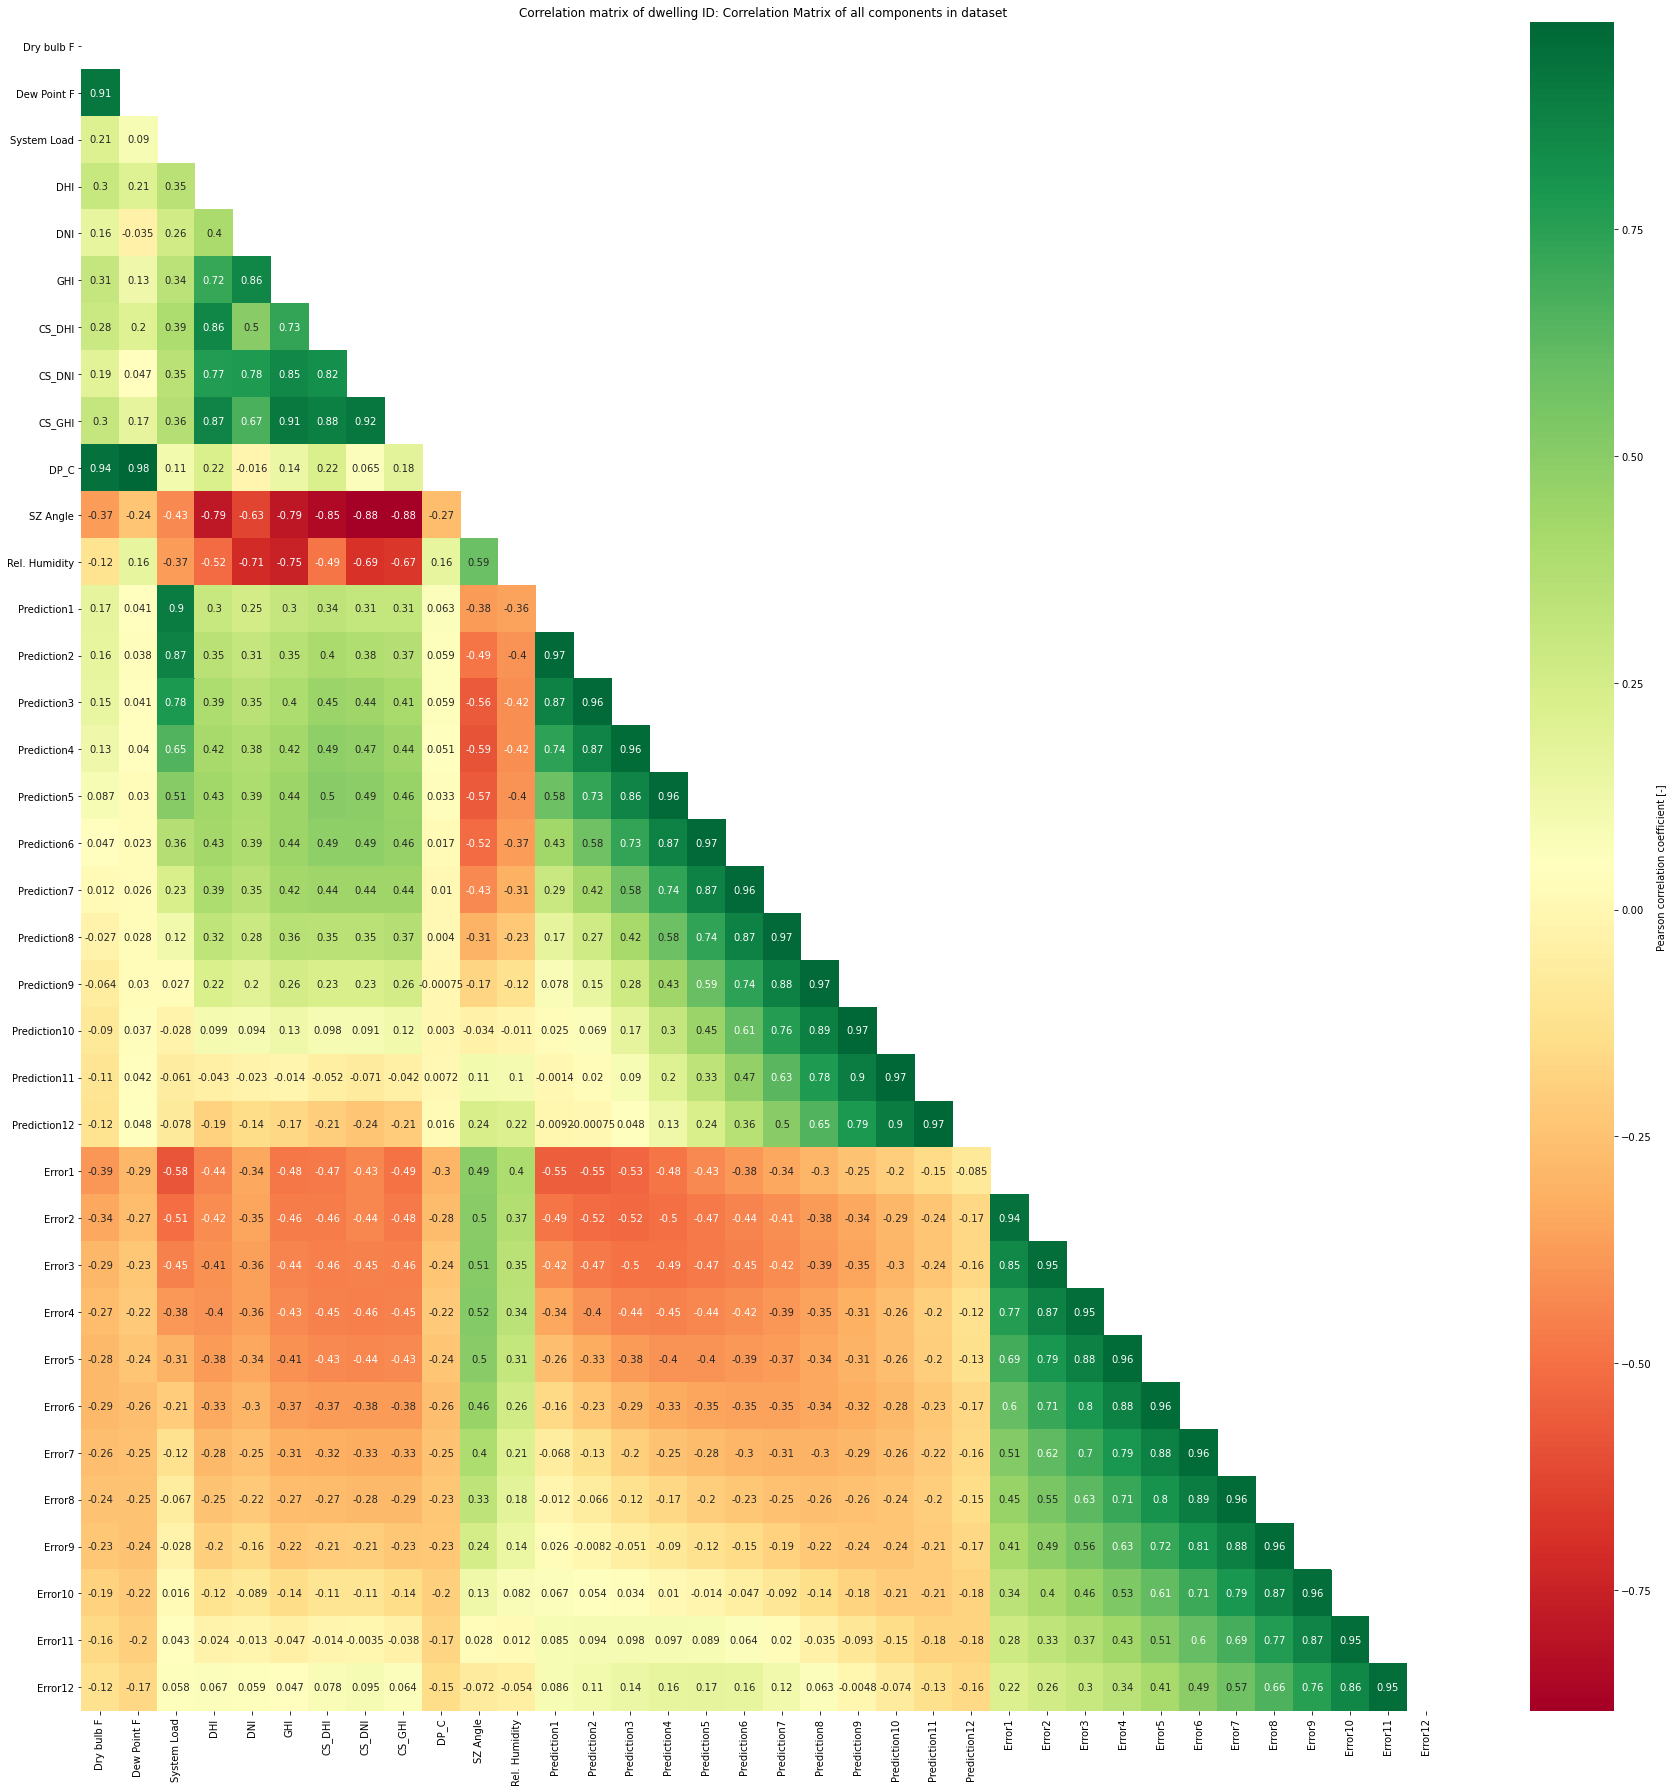

In [19]:
import seaborn as sns
from keijzer import *

fig = create_corr_matrix(norm_df2, 'Correlation Matrix of all components in dataset', True, size=(25,25))
fig.savefig('correlation_matrix.png')

corrMatrix = norm_df2.corr()
print(corrMatrix)

In [20]:
norm_df2 = np.array(norm_df2)
print(norm_df2.shape)
timesteps = 24
output_timesteps = 1
Xe, Ye = create_dataset(norm_df2, timesteps, output_timesteps)
print(Xe.shape)
print(Ye.shape)

(55170, 36)
(55144, 24, 36)
(55144, 1, 36)


In [21]:
trXe = Xe[:50000, :, :]
vaXe = Xe[50000:, :, :]
trYe = Ye[:50000, :, -12:]
vaYe = Ye[50000:, :, -12:]
trYe = trYe.reshape(-1,12)
vaYe = vaYe.reshape(-1,12)
print(trXe.shape)
print(trYe.shape)
print(vaXe.shape)

(50000, 24, 36)
(50000, 12)
(5144, 24, 36)


In [22]:
with tf.device('/gpu:0'):
    alpha=1.0
    gamma=1.2
    beta = 1.178511
    num_features = 36
    hfilters = 128
    hkernel_size1 = 2
    hkernel_size2 = 4
    visible1e = Input(shape=(timesteps, num_features))
    per1 = Permute((2,1))(visible1e)
    den1a = Dense(timesteps, activation='tanh')(per1)
    den1b = Dense(timesteps, activation='sigmoid')(per1)
    den1 = Multiply()([den1a, den1b])
    per2 = Permute((2,1), name='attention_vece')(den1)
    mul1 = Multiply()([visible1e, per2])
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res01 = Add()([d1, visible1e])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res02 = Add()([d1, res01])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res03 = Add()([d1, res02])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res04 =Add()([d1, res03])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res04)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=32)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res05 = Add()([d1, res04])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=32)(res05) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res06 = Add()([d1, res05])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res06) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res07 = Add()([d1, res06])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res07)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res08 = Add()([d1, res07])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res08)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res09 = Add()([d1, res08])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res09) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res10 = Add()([d1, res09])   # 
    
    print('res10 :', res10.shape)  # (None, 24, 11) 
    
    oute = Conv1D(512, 1, padding='same', activation='relu')(res10)   # 256, 11X10=110  
    oute = Dropout(0.2)(oute)   
    
    oute = Conv1D(256, 1, padding='same', activation='relu')(oute) # 512,  110X5=550
    oute = Dropout(0.2)(oute)  
    
    oute = GlobalAveragePooling1D()(oute) # pool_size=2, strides=1
    
    oute = Dense(12)(oute) 
    modele = Model(inputs=[visible1e], outputs=[oute])
    
    print(modele.summary())
    
    modele.compile(loss=root_mean_squared_error, optimizer='adam', metrics=[root_mean_squared_error, 'mse', 'mae', 'mape'])
    early_stopping =EarlyStopping(monitor='val_loss', patience=100)
    batch_size = 100
    epochs = 1000

    history = LossHistory()
    history.init()
    
    #hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

res10 : (?, 24, 36)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 24, 36)]     0                                            
__________________________________________________________________________________________________
permute_1 (Permute)             (None, 36, 24)       0           input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 36, 24)       600         permute_1[0][0]                  
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 36, 24)       600         permute_1[0][0]                  
________________________________________________________________________

In [23]:
    %%time
    histe = modele.fit(trXe, trYe, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaXe, vaYe), callbacks=[history, early_stopping])  # , checkpoint

Train on 50000 samples, validate on 5144 samples
Epoch 1/1000
49900/50000 [============================>.] - ETA: 0s - loss: 0.0255 - root_mean_squared_error: 0.0255 - mean_squared_error: 7.7573e-04 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 521.8233

C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


50000/50000 [==============================] - 15s 296us/sample - loss: 0.0256 - root_mean_squared_error: 0.0256 - mean_squared_error: 7.7586e-04 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 521.1432 - val_loss: 0.0268 - val_root_mean_squared_error: 0.0268 - val_mean_squared_error: 7.2086e-04 - val_mean_absolute_error: 0.0198 - val_mean_absolute_percentage_error: 358.7449
Epoch 2/1000
50000/50000 [==============================] - 13s 269us/sample - loss: 0.0258 - root_mean_squared_error: 0.0258 - mean_squared_error: 7.8841e-04 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 437.5468 - val_loss: 0.0242 - val_root_mean_squared_error: 0.0242 - val_mean_squared_error: 5.8907e-04 - val_mean_absolute_error: 0.0181 - val_mean_absolute_percentage_error: 742.5723
Epoch 3/1000
50000/50000 [==============================] - 14s 270us/sample - loss: 0.0177 - root_mean_squared_error: 0.0177 - mean_squared_error: 3.5067e-04 - mean_absolute_error: 0.0135 - mean_abs

In [24]:
dataall = np.hstack([load, pv, weather_dat])
index=['Dry bulb F','Dew Point F', 'System Load', 'Measured PV','DHI','DNI','GHI','CS_DHI','CS_DNI','CS_GHI','DP_C','SZ Angle','Surf Albedo','Wind Speed', 'Rel. Humidity']
dataall = np.vstack([index, dataall])
print(dataall.shape)
print(max(dataall[1:,2]))
df = pd.DataFrame(dataall[1:,:], columns=dataall[0,:])
df.head()
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)
norm_df2 = norm_df.iloc[55170:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 14]]

eteX, eteY = create_dataset(np.array(norm_df2), timesteps, output_timesteps)

print(eteX.shape)
print(eteY.shape)
print(tePredict.reshape(-1,12).shape)

npnorm2 =np.array(norm_df2)
npnorm2 = npnorm2[24:-13,:]
print(npnorm2.shape)

(78841, 15)
9999.0
(23644, 24, 12)
(23644, 1, 12)
(23633, 12)
(23633, 12)


In [25]:
pr_df = pd.DataFrame(tePredict.reshape(-1,12), columns=Prindex)
pr_df.head()

,Prediction1,Prediction2,Prediction3,Prediction4,Prediction5,Prediction6,Prediction7,Prediction8,Prediction9,Prediction10,Prediction11,Prediction12
0,0.269996,0.284299,0.283537,0.248280,0.196403,0.151224,0.117677,0.096878,0.086778,0.083979,0.088664,0.112394
1,0.285585,0.277820,0.244330,0.195492,0.146768,0.110837,0.089857,0.080636,0.078634,0.082862,0.102655,0.143280
2,0.291679,0.252934,0.193481,0.141146,0.105096,0.083450,0.073495,0.071556,0.080715,0.118204,0.177332,0.220680
3,0.254123,0.193566,0.132874,0.092700,0.073861,0.065657,0.065201,0.075504,0.109713,0.178575,0.244255,0.265153
4,0.188416,0.133087,0.093725,0.071945,0.064137,0.062498,0.069370,0.103588,0.163548,0.214205,0.237985,0.246033


In [26]:
teY = testY.reshape(-1,12)
e_te = testPredict-teY
er_df = pd.DataFrame(e_te, columns=Erindex)
er_df.head()

,Error1,Error2,Error3,Error4,Error5,Error6,Error7,Error8,Error9,Error10,Error11,Error12
0,-0.008631,-0.014970,-0.016034,-0.009101,-0.002689,0.007646,0.010082,0.009218,0.008352,0.006311,-0.003842,-0.023463
1,-0.013683,-0.021751,-0.013051,-0.003599,0.003190,0.003242,0.002196,0.002211,0.000966,-0.009644,-0.033202,-0.066107
2,-0.007892,-0.004447,-0.005611,-0.002433,-0.002499,-0.004211,-0.004930,-0.006112,-0.011791,-0.017652,-0.032055,-0.049065
3,-0.003258,-0.005526,-0.010704,-0.014895,-0.013800,-0.012768,-0.012468,-0.017001,-0.026143,-0.030812,-0.025490,-0.036689
4,-0.010675,-0.010491,-0.013870,-0.015716,-0.014288,-0.015170,-0.023135,-0.032268,-0.045839,-0.055540,-0.063857,-0.074179


In [27]:
prnorm = np.array(pr_df)
ernorm =np.array(er_df)
print(ernorm.shape)

(23633, 12)


In [28]:
etedat = np.concatenate((npnorm2, prnorm, ernorm), axis=1)
print(etedat.shape)

(23633, 36)


In [29]:
eteX, eteY = create_dataset(etedat, timesteps, output_timesteps)
eteY = eteY[:,:,24:].reshape(-1,12)
print(eteX.shape)
print(eteY.shape)

(23607, 24, 36)
(23607, 12)


In [30]:
etePredict = modele.predict(eteX, batch_size=batch_size)
print(etePredict.shape)
print(etePredict)

C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


(23607, 12)
[[ 0.00374964  0.00997081  0.01205451 ...  0.00594996  0.01001634
   0.01596773]
 [-0.00212364  0.00254909  0.0020041  ...  0.0009606   0.01239956
   0.02995455]
 [-0.01425187 -0.01339653 -0.01357787 ... -0.01927392 -0.01602098
  -0.01304374]
 ...
 [-0.00728699 -0.00957467 -0.01121573 ... -0.01580556 -0.00135413
   0.00244818]
 [-0.01513599 -0.01935195 -0.0242122  ... -0.02303631 -0.0130869
  -0.00022744]
 [-0.01444592 -0.01866283 -0.02321519 ...  0.00879571  0.02673516
   0.03524508]]


In [31]:
testPredict = tePredict.reshape(-1,12)
addtestPredict = -etePredict + testPredict[24:-2,:]
print(addtestPredict.shape)

(23607, 12)


In [32]:
print('Error Test Score > RMSE == ', np.sqrt(np.mean(np.square(teY[24:-2,:]-testPredict[24:-2,:]))), ' MAE == ', mean_absolute_error(teY[24:-2,:], testPredict[24:-2,:]), 'MAPE == ', mean_absolute_percentage_error(teY[24:-2,:], testPredict[24:-2,:]))
print('Error Test Score > RMSE == ', np.sqrt(np.mean(np.square(teY[24:-2,:]-addtestPredict))), ' MAE == ', mean_absolute_error(teY[24:-2,:], addtestPredict), 'MAPE == ', mean_absolute_percentage_error(teY[24:-2,:], addtestPredict))

Error Test Score > RMSE ==  0.03788664489861359  MAE ==  0.026634587273124215 MAPE ==  9.651225000929609
Error Test Score > RMSE ==  0.014215717081592829  MAE ==  0.01035755807156702 MAPE ==  4.207609977264204


In [33]:
np.savetxt('FSEFF_EL_FinaltestPredict.txt', addtestPredict)

In [34]:
layer_outputs = [layer.output for layer in modele.layers if layer.name=='attention_vece']
activation_model = tf.keras.models.Model(inputs=modele.input, outputs=layer_outputs)
attention_vectors = []
output_data = activation_model.predict(eteX, batch_size=batch_size)
output_data = np.array(output_data)
print(output_data.shape)
at_vec = np.mean(output_data, axis=0)
print(at_vec, at_vec.shape)
np.savetxt('Attention_FSEFF_EL.txt', at_vec)
at_vec = abs(at_vec)

C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


(23607, 24, 36)
[[ 1.20871095e-03  1.15196954e-03 -2.75441475e-04 -4.57078079e-03
  -1.61259517e-03 -9.50126385e-04 -8.04482587e-03  1.09286532e-02
   6.06691651e-03  1.19229429e-03  3.26148770e-03  1.46515202e-03
  -3.88872839e-04 -3.46182933e-04 -3.17294034e-04 -2.73363257e-04
  -2.18549554e-04 -1.73032488e-04 -1.55200934e-04 -1.39177850e-04
  -1.46260063e-04 -1.74860383e-04 -1.96441295e-04 -2.25648488e-04
  -1.81178022e-02 -1.80776473e-02 -1.80476401e-02 -1.78991295e-02
  -1.77936181e-02 -1.77583508e-02 -1.77637879e-02 -1.77082550e-02
  -1.77178942e-02 -1.76440924e-02 -1.74446199e-02 -1.72923952e-02]
 [ 5.41189779e-03  4.07282449e-03  9.20822471e-03  6.74725324e-03
   2.92427093e-03  6.96974993e-03  6.02341397e-03  1.05299493e-02
   1.04224142e-02  4.20125155e-03  7.83960614e-03  2.81567639e-03
   9.30708461e-03  9.28154681e-03  9.24066640e-03  9.21017025e-03
   9.22834687e-03  9.27533116e-03  9.32311919e-03  9.37094167e-03
   9.42799915e-03  9.45497770e-03  9.45036951e-03  9.418630

In [35]:
import shap
shap.initjs()
background = trXe[np.random.choice(trXe.shape[0], 300, replace=False)]
print(background.shape)
explainer = shap.DeepExplainer(modele, background)
test_sample = trXe[-100:]
shap_values = explainer.shap_values(background)

(300, 24, 36)



In [36]:
index2 = np.concatenate([index, Prindex, Erindex])

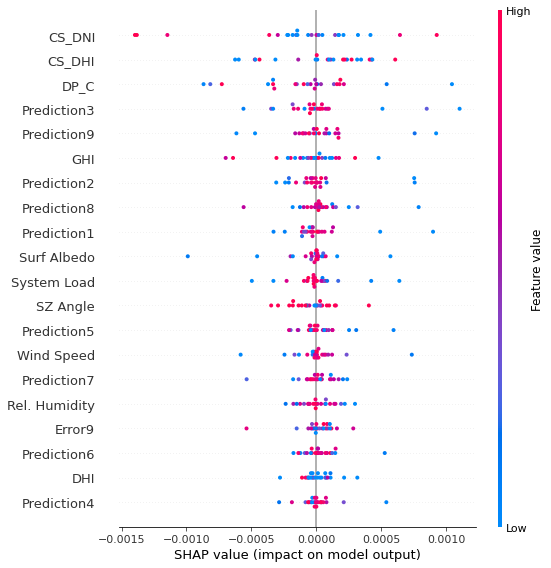

In [37]:
shap.summary_plot(shap_values[0][0], background[0], feature_names=index2)
#shap.force_plot(explainer.expected_value[0], shap_values[0], feature_names=index)

In [38]:
shap_np = np.array(shap_values[0])
shap_np = shap_np.reshape(-1,num_features)
print("=========================================================================")
print(shap_np)
np.savetxt('SHAP_VALUES_FSEFF_EL.txt', shap_np)

[[-3.86629138e-05  3.84254072e-05  4.22650261e-04 ...  2.48576559e-06
  -3.61912603e-05  5.62886065e-05]
 [ 1.32633911e-05 -5.53420556e-05 -3.30667000e-04 ... -7.66858381e-06
  -1.26313478e-05 -3.01626310e-05]
 [-2.53045789e-05 -2.36180688e-05  6.38988652e-04 ... -1.57886642e-06
  -1.30601565e-05 -7.51957467e-06]
 ...
 [-2.30698311e-04  6.71883476e-05  1.64467813e-04 ...  1.23575643e-03
   7.73514734e-04 -2.61606153e-03]
 [-4.39878171e-05 -1.00221787e-04  2.64827461e-04 ... -1.27511714e-04
  -2.23422488e-04 -9.53065114e-04]
 [ 1.16836517e-04 -4.02568806e-04 -1.42695307e-05 ...  1.18539767e-03
   8.58284131e-04  1.86729737e-04]]


In [39]:
shap.initjs()
background = trX[np.random.choice(trX.shape[0], 300, replace=False)]
print(background.shape)
explainer = shap.DeepExplainer(model, background)
test_sample = trX[-100:]
shap_values = explainer.shap_values(background)

(300, 24, 12)


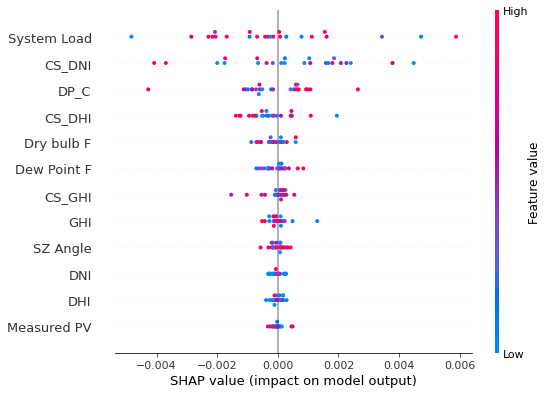

In [40]:
shap.summary_plot(shap_values[0][0], background[0], feature_names=index)
#shap.force_plot(explainer.expected_value[0], shap_values[0], feature_names=index)

In [41]:
shap_np = np.array(shap_values[0])
shap_np = shap_np.reshape(-1,num_features)
print("=========================================================================")
print(shap_np)
np.savetxt('SHAP_VALUES_FSEFF.txt', shap_np)

[[-6.73229579e-04  6.59433114e-04  5.88142233e-03 ...  1.85372204e-04
   9.88689532e-04  8.56171054e-05]
 [-2.33546940e-04  1.41817104e-04  2.78469664e-04 ...  1.51485104e-04
   6.34791285e-04  1.26770524e-04]
 [-2.95673283e-04  2.21811980e-04 -2.49530099e-04 ...  1.90305794e-06
  -8.38008228e-04  1.53258817e-04]
 ...
 [-3.90618695e-05  2.39415749e-04  1.81075013e-03 ...  3.29965571e-04
   5.25398283e-05  5.02393618e-05]
 [ 7.15547070e-04 -1.99066385e-05 -2.16430402e-03 ... -4.66843219e-05
   4.39142478e-04 -2.34130796e-04]
 [ 1.41279119e-04  1.59031154e-04  3.81416110e-03 ... -1.96792981e-03
   1.53168650e-03  3.23909957e-04]]
